In [34]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

### Load and Visualize the Dataset

In [35]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"Training set  : {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_test.shape}, {y_test.shape}")

Training set  : (60000, 28, 28), (60000,)
Validation set: (10000, 28, 28), (10000,)


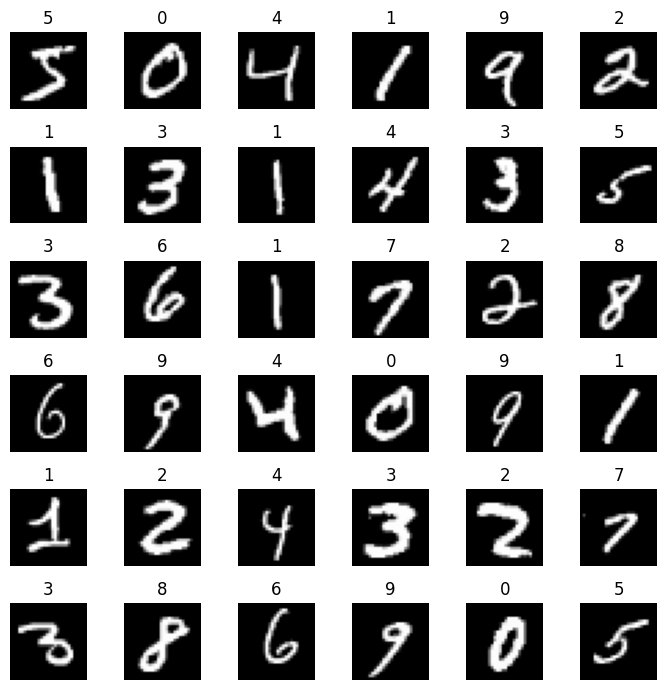

In [36]:
# Visualize a few input data
plt.figure(figsize=(7, 7))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f"{y_train[i]}")
plt.tight_layout()
plt.show()

### Design the Model

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),             # Input 28x28 image
    tf.keras.layers.Flatten(),                         # Convert 28x28 image to 784 vector
    tf.keras.layers.Dense(128, activation='relu'),     # Hidden layer with ReLU
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [38]:
training = model.fit(x_train,
                     y_train,
                     epochs=5,
                     validation_data=(x_test, y_test),
                     verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9248 - loss: 0.2624 - val_accuracy: 0.9622 - val_loss: 0.1333
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9654 - loss: 0.1167 - val_accuracy: 0.9710 - val_loss: 0.0946
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9765 - loss: 0.0784 - val_accuracy: 0.9729 - val_loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9821 - loss: 0.0589 - val_accuracy: 0.9752 - val_loss: 0.0771
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0450 - val_accuracy: 0.9772 - val_loss: 0.0722


### Evaluate the Model

In [39]:
validation_scores = model.evaluate(x_test, y_test)

scoring_metric_names = ['Loss', 'Accuracy']
for i, metric_name in enumerate(scoring_metric_names):
    last_training_score = training.history[metric_name.lower()][-1]
    print(f"Training {metric_name}  : {last_training_score:.2f}")
    print(f"Validation {metric_name}: {validation_scores[i]:.2f}")
    print()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0722
Training Loss  : 0.04
Validation Loss: 0.07

Training Accuracy  : 0.99
Validation Accuracy: 0.98



### Make Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


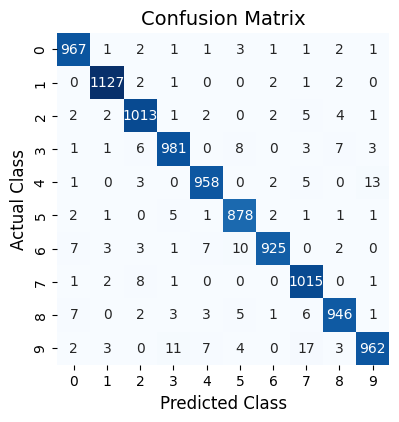

In [40]:
predictions = model.predict(x_test)

# Convert probablily distribution to classes
predicted_classes = np.argmax(predictions, axis=1)

correct_indices = []
incorrect_indices = []
for i in range(len(predicted_classes)):
    if predicted_classes[i] == y_test[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

# Plot confusion matrix
plt.figure(figsize=(25, 25))
cm = confusion_matrix(y_test, predicted_classes)
ax = plt.subplot(5, 2, 3 * 2 - 1, aspect='equal')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_title(f'Confusion Matrix', fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=12)
ax.set_ylabel('Actual Class', fontsize=12)
ax.tick_params(labelsize=10)
plt.show()

Correct Predictions: 9772


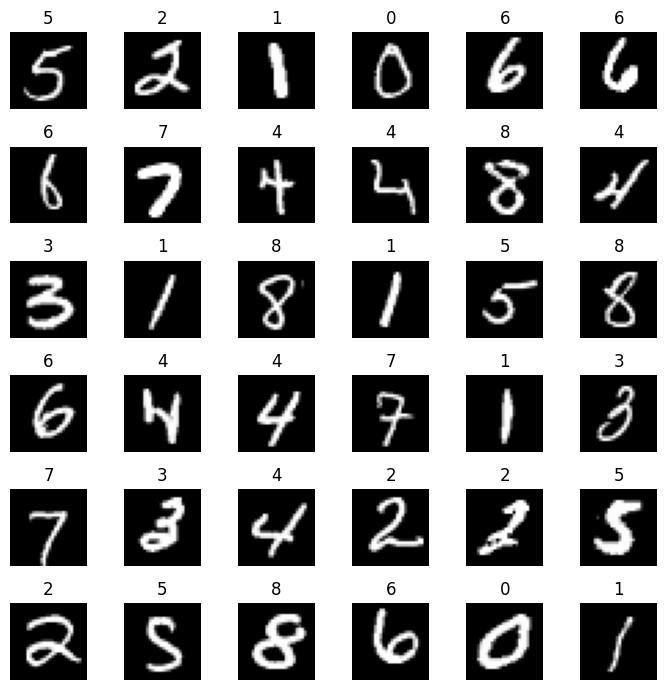

In [41]:
print("Correct Predictions:", len(correct_indices))

# Show some random predictions
plt.figure(figsize=(7,7))
for i in range(36):
    idx = random.choice(correct_indices)
    plt.subplot(6,6,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"{predicted_classes[idx]}")
plt.tight_layout()
plt.show()

Incorrect Predictions: 228


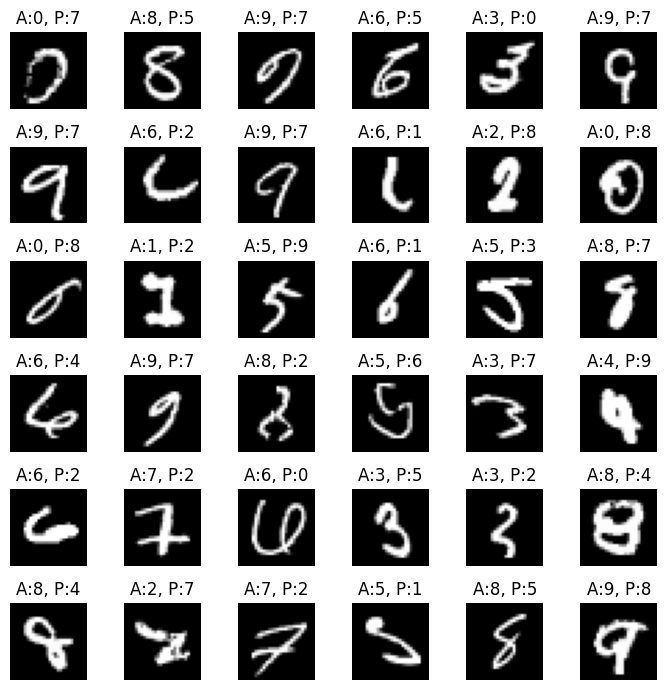

In [ ]:
print("Incorrect Predictions:", len(incorrect_indices))

# Show incorrect predictions
plt.figure(figsize=(7,7))
for i in range(36):
    idx = random.choice(incorrect_indices)
    plt.subplot(6,6,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"P:{predicted_classes[idx]}, A:{y_test[idx]}")    
plt.tight_layout()
plt.show()

### Visualize Training Epochs

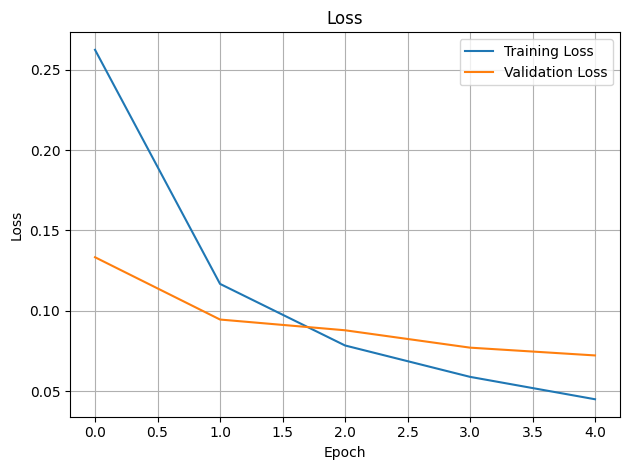

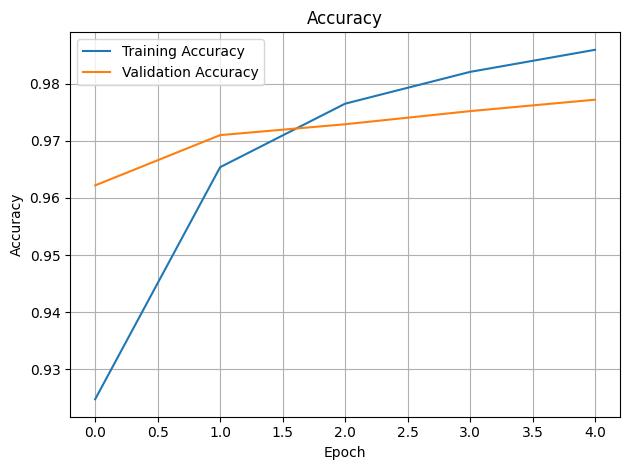

In [43]:
# Plot training scoring metrics
for metric_name in scoring_metric_names:
  metric = metric_name.lower()
  val_metric = f'val_{metric}'
  plt.plot(training.history[metric], label=f'Training {metric_name}')
  plt.plot(training.history[val_metric], label=f'Validation {metric_name}')
  plt.title(f'{metric_name}')
  plt.xlabel('Epoch')
  plt.ylabel(metric_name)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()